In [55]:
import torch
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv('length_weight.csv')
y_train = train.pop('weight')
x_train = torch.tensor(train.to_numpy(), dtype=torch.double).reshape(-1, 1)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.double).reshape(-1, 1)

In [51]:
class LinearRegressionModel:

	def __init__(self):
		# requires_grad enables calculation of gradients
		self.W = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)
		self.b = torch.tensor([[0.0]], requires_grad=True, dtype=torch.double)
	
	# Predictor
	def f(self, x):
		return x @ self.W + self.b
	
	# Uses Mean Squared Error
	def loss(self, x, y):
		return torch.nn.functional.mse_loss(self.f(x), y)
		# return torch.mean(torch.square(self.f(x) - y))

	def parameters(self):
		return [self.W, self.b]


In [58]:
model = LinearRegressionModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), 1e-4) # learning rate
for epoch in range(500_000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b,
    optimizer.zero_grad()  # Clear gradients for next step

W = tensor([[0.2381]], dtype=torch.float64, requires_grad=True), b = tensor([[-8.4904]], dtype=torch.float64, requires_grad=True), loss = tensor(0.9943, dtype=torch.float64, grad_fn=<MseLossBackward>)


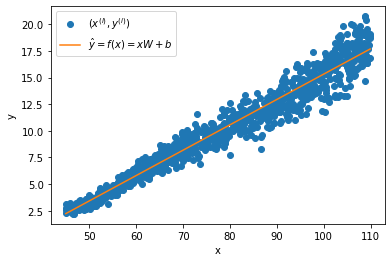

In [57]:
# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])  
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()
